In [1]:
import WSR98D

ModuleNotFoundError: No module named 'WSR98D'

In [2]:
import os
import matplotlib.pyplot as plt
import pyart

path = '/Users/xiaowu/Library/Mobile Documents/com~apple~CloudDocs/work/MeteoDataFusion'
infile = os.path.join(path,'test','data','Z9002.20220425.060745.AR2.bz2')
radar = WSR98D.WSR98DData(infile).data
compz = WSR98D.WSR98DData(infile).compz



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: D

NameError: name 'WSR98D' is not defined

In [ ]:
print(radar.info)
for field_name in radar.fields.keys():
    print(field_name)


In [ ]:
from pycwr.io import read_auto
PRD = read_auto(infile)
PyartRadar = PRD.ToPyartRadar()
#for field_name in PyartRadar.fields.keys():
#    print(field_name)
radar.fields.keys()

In [ ]:
ref = radar.fields['reflectivity']['data']
ref.shape

In [ ]:
fig = plt.figure(figsize=(8,6))
ax  = plt.subplot(111)
composite_display = pyart.graph.RadarDisplay(radar)
composite_display.plot("reflectivity", ax=ax,
                       vmin=-20, vmax=80, cmap='pyart_HomeyerRainbow')


In [ ]:
plt.imshow(radar.fields['reflectivity']['data'])


In [2]:
import os

import sys
sys.path.append("..")

import numpy as np
from netCDF4 import Dataset  # 读取nc文件用到的包
from scipy.interpolate import griddata  # 对SST空间插值用到的函数
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime


In [3]:
path = r'/Users/xiaowu/Library/Mobile Documents/com~apple~CloudDocs/work/MeteoDataFusion/test/data/0920test'
#filename = r'FY4A-_LMI---_N_REGX_1047E_L2-_LMIE_SING_NUL_20220920130510_20220920131449_7800M_N03V1.NC'
filename = r'FY4A-_AGRI--_N_REGC_1047E_L2-_CTT-_MULT_NOM_20221214135336_20221214135753_4000M_V0001.NC'
infile = os.path.join(path, filename)

Dataset(filename)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dataset_name: CTT
    naming_authority: NSMC CMA
    Institution: NSMC
    Project: NOM
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    Title: FY4A AGRI L2 Cloud Top Temperature
    Summary: Cloud Top Temperature
    platform_ID: FY4A
    instrument_type: FY4A Advanced Geosynchronous Radiation Imager
    instrument_ID: AGRI
    processing_level: L2
    date_created: 2022-12-14T14:04:54Z
    production_site: NSMC
    production_environment: UNIX
    Version Of Software: V1.0
    Software Revision Date: 2017-09-12
    scene_id: Full Disk possible values are Full Disk, Southern HEMisphere, the Northern HEMisphere, Regional, China Regional
    spatial_resolution: 4km at nadir
    time_coverage_start: 2022-12-14T13:53:37.806Z
    time_coverage_end: 2022-12-14T13:57:47.591Z
    Data Quality: 0
 

In [4]:
dataset = Dataset(filename)
ds_name = dataset.dataset_name
long_name = dataset.Title
print(ds_name,'\n', long_name)

CTT 
 FY4A AGRI L2 Cloud Top Temperature


In [5]:
dataset.variables.keys()

dict_keys(['y', 'x', 'CTT', 'DQF', 'nominal_satellite_subpoint_lat', 'nominal_satellite_subpoint_lon', 'nominal_satellite_height', 'geospatial_lat_lon_extent', 'OBIType', 'processing_parm_version_container', 'algorithm_product_version_container'])

In [6]:
dataset.variables['CTT']

<class 'netCDF4._netCDF4.Variable'>
>f4 CTT(x, y)
    long_name: FY4A PGS AGRI L2 Cloud Top Temperature
    standard_name: Cloud Top Temperature
    _Unsigned: TRUE
    FillValue: -999.0
    valid_range: [160. 320.]
    scale_factor: 1.0
    add_offset: 0.0
    units: K
    resolution: 4KM
    coordinates: x y
    ancillary_variables: DQF
    Description: 65535:Space, -999:FillValue
unlimited dimensions: 
current shape = (1092, 2748)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
dataset.variables['EGA']

KeyError: 'EGA'

## read the airborne radar data

In [28]:
import os
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import ioo, interp, graph

['__header__', '__version__', '__globals__', 'WX_Data', 'az_out']


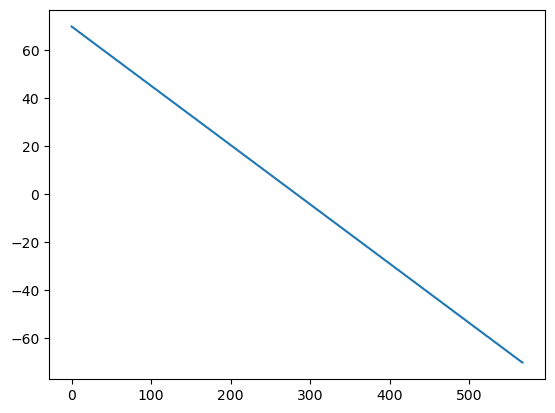

In [30]:
path = r'/Users/xiaowu/Library/Mobile Documents/com~apple~CloudDocs/work/MeteoDataFusion/test/data/0920test'
filename = r'azfile.mat'
infile = os.path.join(path, filename)

data = scio.loadmat(infile)
print(list(data.keys()))
plt.plot(data['az_out'])

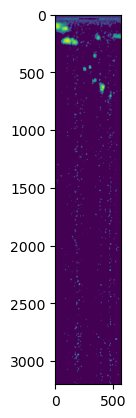

In [9]:
plt.imshow(data['WX_Data'])

In [10]:
Bin_length = 0.15
ref = data['WX_Data']
radarX = np.zeros( ref.shape, dtype = float ) 
radarY = np.zeros( ref.shape, dtype = float ) 

for i_az, az in enumerate(data['az_out']):  # azimuth comes from east, the direction is counterclockwise
        bin_no = np.arange(0, ref.shape[0])
        i_az_valied = interp.interpolation.AngleToValid(i_az)
        radarX[:,i_az] = bin_no * Bin_length * np.sin(np.deg2rad(az))
        radarY[:,i_az] = bin_no * Bin_length * np.cos(np.deg2rad(az))

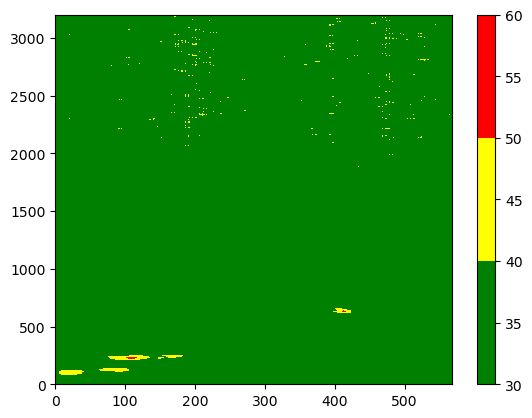

In [6]:
import matplotlib.colors as colors
ac_colors = ['Green', 'Yellow', 'Red']
cmap_ac = colors.ListedColormap(ac_colors)
plt.pcolormesh(ref, cmap = cmap_ac, vmin = 30, vmax = 60)
plt.colorbar()

In [11]:
np.nanmin(ref)

0.0

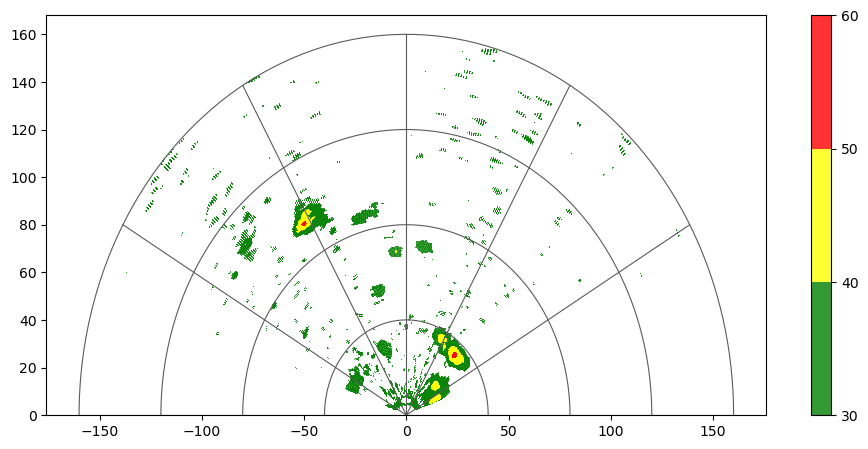

In [13]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0.1, 0.3, 0.9, 0.5])
ref = np.where(ref < 10, np.nan, ref)
pc = ax1.pcolormesh( radarX[0:1067,:], radarY[0:1067,:], ref[0:1067,:], vmin=30, vmax = 60, shading='auto', cmap = cmap_ac,alpha = 0.8 )
rect = [0.125, 0.26, 0.35, 0.015] 
#cbar_ax = fig.add_axes(rect)
#cb = fig.colorbar(pc, drawedges=True, cax=cbar_ax, orientation='horizontal',spacing='uniform', ticks = [30,40,50,60])  
plt.colorbar(mappable=pc, ax=ax1, orientation="vertical",ticks = [30,40,50, 60])

graph.acdisplay.add_ring(ax1, 0,np.pi, [40,80, 120, 160], color="#5B5B5B", linestyle='-', linewidth=0.8)


## read the fusioned data for merging and visualization

In [14]:
from datetime import date, datetime,timedelta
time_range = [ datetime(2022,9,20,13,0,0), datetime(2022,9,20,14,0,0) ]

resolution = 0.01 # km
extend_ll= [15, 30, 100, 130] 

path = r'/Users/xiaowu/Library/Mobile Documents/com~apple~CloudDocs/work/MeteoDataFusion'
filename = [r'FY4A-_AGRI--_N_REGC_1047E_L2-_CLM-_MULT_NOM_20220920131500_20220920131917_4000M_V0001.NC']
fy4_infile = []
for i_file in filename:
    fy4_infile.append(os.path.join(path, 'test','data','0920test',i_file))
    #infile = os.path.join(path, 'test','data','0920test',i_file)

path = '/Users/xiaowu/Library/Mobile Documents/com~apple~CloudDocs/work/MeteoDataFusion'
filename = ['Z_RADA_C_BABJ_20220920050600_P_DOR_RDCP_R_ACHN.PNG']
cref_infile = []
for i_file in filename:
    cref_infile.append(os.path.join(path,'test','data','0920test',i_file))

# 设置资料来源，fy4_infile是存储FY4A文件名的列表，cref_infile是存储地面反射率拼图文件名的列表，datatype指定其分别对应什么资料来源，
# time_range表示截取的时间范围，extend_ll为插值后的起止经纬度，resolution为插值分辨率。
Fusion_object = ioo.data_prep.FusionData(filename= [fy4_infile, cref_infile], datatype= ['FY4A', 'chinese_mosiac'], \
        time_range = time_range, extend_ll= extend_ll, resolution = resolution)

source:  FY4A
1500 3000
0 CLM
source:  chinese_mosiac
Input file size is 1024, 880
0...10...20...30...40...50...60...70...80...90...100 - done.
Using band 4 of source image as alpha.
Creating output file that is 1459P x 851L.
Processing dbz.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
1500 3000
0 cref


In [15]:
print(Fusion_object.__doc__, '\n', Fusion_object.FusionDS.keys())


    A class for storing gridded fusioned weather data in Cartesian coordinate.

    Attributes
    ----------

    time_s, time_e: datetime
        extend of time range.
    extend_ll : list
        extend of the lat & lon. [ lat_begin, lat_end, lon_begin, lon_end ]
    resolution : float
        grid resolution.
    FusionDS   : dict of dict.
        variables from radar or satellite based products.
        eg. FusionDS.WSR88D.turbulence[it,iy,ix]`

     
 dict_keys(['FY4A', 'chinese_mosiac'])


In [16]:
ac_parameters = {"Rmax_Air": 240, "Rmin_Air": 0, "heading_angle": 102, "ll_center": [22.402, 112.766],
                "range_angle": 90, "Bin_length": 150, "DMS":False}

先不考虑外推，只有1个时刻的数据，所以FusionDS后面的时刻选0。如Fusion_object.FusionDS['chinese_mosiac']['cref']['cref'][0]。

dict_keys(['FY4A', 'chinese_mosiac'])
112.766 22.402


Text(0.5, 1.0, 'cloud mask, the whiter, the cloudier')

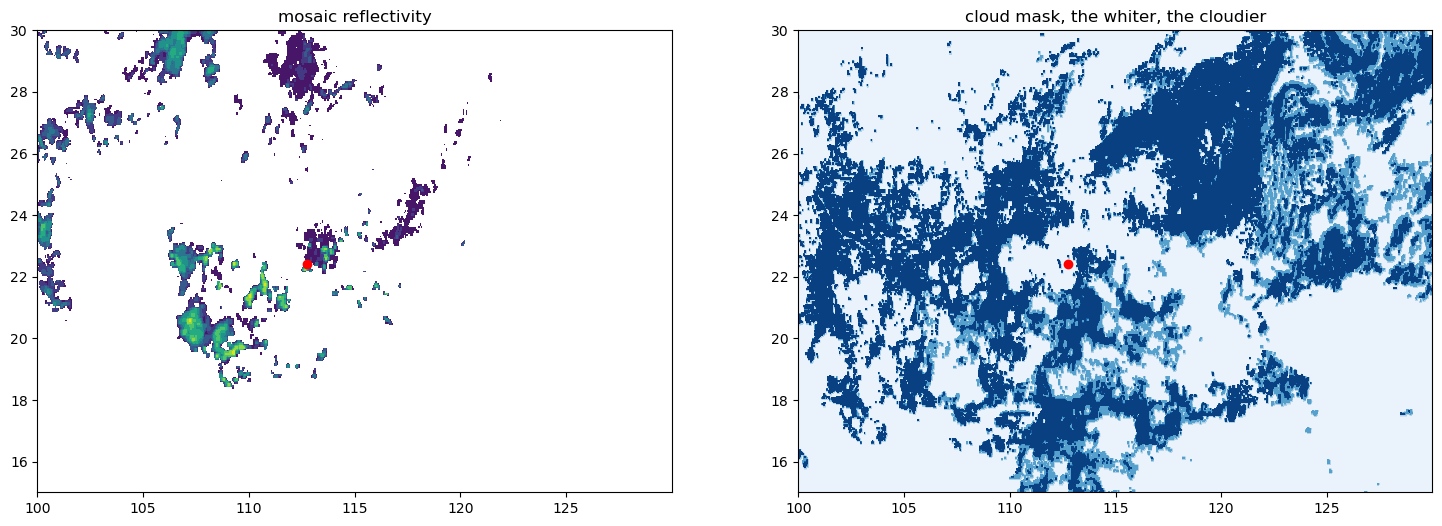

In [17]:
lat = Fusion_object.Lat_des_1D
lon = Fusion_object.Lon_des_1D

import matplotlib.pyplot as plt
print(Fusion_object.FusionDS.keys())

fig = plt.figure(figsize=(18,6))
print(ac_parameters['ll_center'][1],ac_parameters['ll_center'][0])
ax = fig.add_subplot(1,2,1)
Lon_2D, Lat_2D = np.meshgrid(lon, lat) #打网格 (x,y)

var_cref = Fusion_object.FusionDS['chinese_mosiac']['cref']['cref'][0]
plt.contourf(Lon_2D, Lat_2D, var_cref)
ax.scatter(ac_parameters['ll_center'][1], ac_parameters['ll_center'][0] ,c = 'red')
ax.set_title('mosaic reflectivity')

ax2 = fig.add_subplot(1,2,2)
var_clm = Fusion_object.FusionDS['FY4A']['CLM']['CLM'][0]
ax2.contourf(Lon_2D, Lat_2D, var_clm, cmap='Blues')
ax2.scatter(ac_parameters['ll_center'][1], ac_parameters['ll_center'][0] ,c = 'red')
ax2.set_title('cloud mask, the whiter, the cloudier')



In [61]:
radarX_FD, radarY_FD, var_ac_cref = interp.interpolation.get_ac(ac_parameters, var_cref, lat, lon)
radarX_FD, radarY_FD, var_ac_clm = interp.interpolation.get_ac(ac_parameters, var_clm, lat, lon)

In [19]:
X1, Y1 = interp.interpolation.rotate(radarX_FD, radarY_FD, ac_parameters['heading_angle']) 

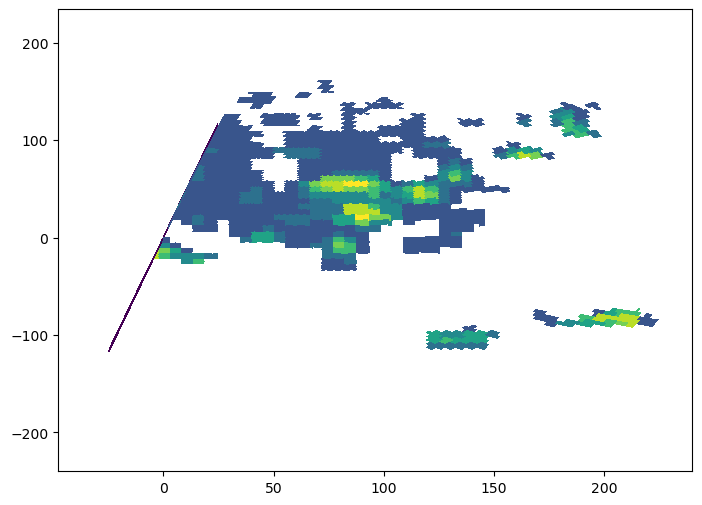

In [20]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
ax.pcolormesh(radarX_FD / 1000, radarY_FD / 1000, var_ac_cref)

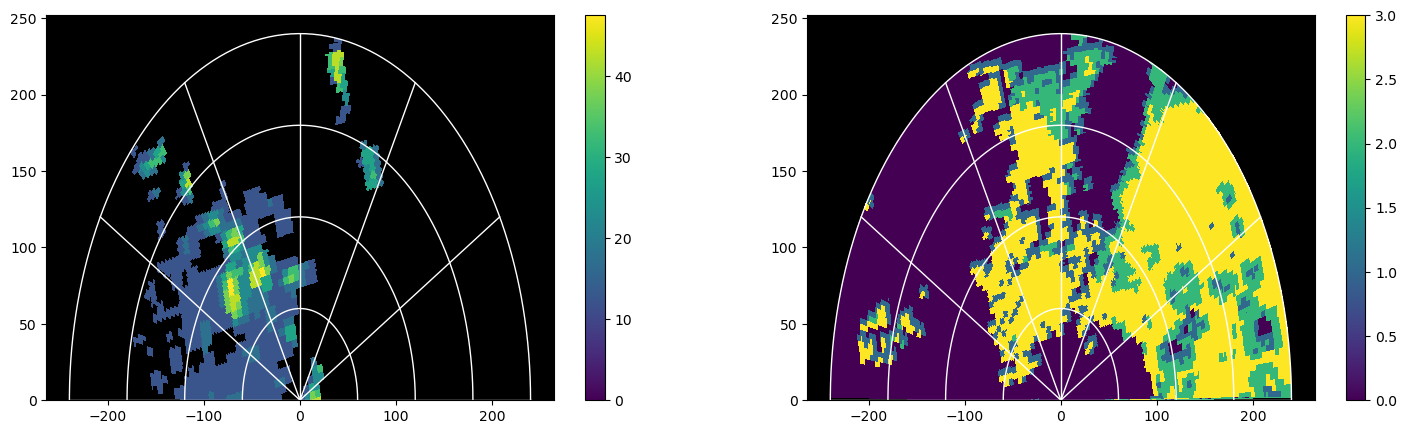

In [111]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1,facecolor='black')
p1 = ax1.pcolormesh(X1 / 1000, Y1 / 1000, var_ac_cref)

ax2 = fig.add_subplot(1,2,2,facecolor='black')
p2 = ax2.pcolormesh(X1 / 1000, Y1 / 1000, var_ac_clm)

graph.acdisplay.add_ring(ax1, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)
graph.acdisplay.add_ring(ax2, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)
plt.colorbar(mappable=p2,ax=ax2)
plt.colorbar(mappable=p1,ax=ax1)


## Fusion

In [23]:
import matplotlib.colors as colors
ac_colors = ['Green', 'Yellow', 'Red']
cmap_ac = colors.ListedColormap(ac_colors)

方案1. 地面回波和机上回波直接叠加，机上绿黄红，地面白蓝

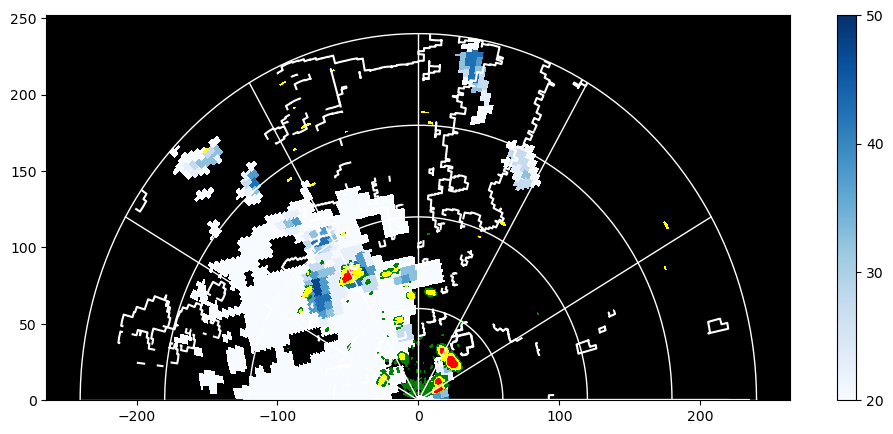

In [24]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1,facecolor='black')
var_ac_clm = np.where(var_ac_clm == 3, np.nan, var_ac_clm) #ac

p_ref = ax.pcolormesh(X1[:,:] / 1000, Y1[:,:]  / 1000, var_ac_cref[:,:],cmap='Blues', vmin = 20, vmax = 50) #CLM
ax.contour(X1[:,:] / 1000, Y1[:,:]  / 1000, var_ac_clm[:,:],[2.5], colors='white') #cmap='Blues', tick_level=np.arange(-0.5,4)) #CLM

ref = np.where(ref < 10, np.nan, ref) #ac
#pc = ax.contourf( radarX[0:1067,:], radarY[0:1067,:], ref[0:1067,:], vmin = 30, vmax = 60, shading='auto', cmap = cmap_ac, \
pc = ax.contourf( radarX[0:int(240/0.15),:], radarY[0:int(240/0.15),:], ref[0:int(240/0.15),:], vmin = 20, vmax = 50, shading='auto', cmap = cmap_ac, \
        tick_level=[20, 30, 40, 50])  
plt.colorbar(mappable=p_ref, ax=ax, orientation="vertical",ticks = [20,30,40,50])
graph.acdisplay.add_ring(ax, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)


In [19]:
print(X1.shape,radarX.T.shape)

(360, 1600) (568, 3200)


方案2. 0-p_range范围内为机载雷达显示，p_range后显示地面雷达，虚线为分界线，另对0-20和70-90的视野盲区进行了补充

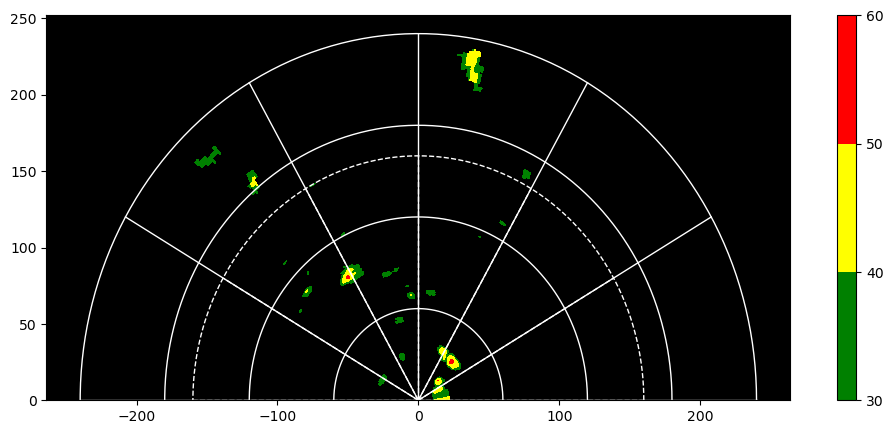

In [25]:
p_range = 160 # km
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1,facecolor='black')
var_ac_clm = np.where(var_ac_clm == 3, np.nan, var_ac_clm) #ac

# plot the mosaic composite refle. beyond the dash.
p_ref = ax.contourf(X1[:,int(p_range/0.15):] / 1000, Y1[:,int(p_range/0.15):]  / 1000, var_ac_cref[:,int(p_range/0.15):],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 
# plot the refl. within 0-20 and 70-90 degree. 
# Note: X1 is with shape of 360*ngate. it is valid between heading_angle-90 to heading_angle+90. 
# So, aiming to use the refl. at 0-20 and 70-90 degree, the slice range is heading_angle-90:heading_angle-90+20 and heading_angle+90-20:heading_angle+90.
heading_angle = ac_parameters['heading_angle']
p_ref2 = ax.contourf(X1[heading_angle-90:heading_angle-90+20,:] / 1000, Y1[heading_angle-90:heading_angle-90+20,:] / 1000, var_ac_cref[heading_angle-90:heading_angle-90+20,:],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 
p_ref3 = ax.contourf(X1[heading_angle+90-20:heading_angle+90,:] / 1000, Y1[heading_angle+90-20:heading_angle+90,:] / 1000, var_ac_cref[heading_angle+90-20:heading_angle+90,:],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 
ref = np.where(ref < 10, np.nan, ref) #ac

pc = ax.contourf( radarX[0:int(p_range/0.15),:], radarY[0:int(p_range/0.15),:], ref[0:int(p_range/0.15),:], [30,40,50,60], shading='auto', cmap = cmap_ac, \
        tick_level=[30, 40, 50, 60])  
plt.colorbar(mappable=p_ref, ax=ax, orientation="vertical",ticks = [30,40,50,60])
graph.acdisplay.add_ring(ax, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)
graph.acdisplay.add_ring(ax, 0, np.pi, [p_range], color='white',linestyle='--', linewidth=1)

方案3. 在2的基础上，增加云掩膜的判断，如果机载雷达上显示有强回波，地面显示无气象，卫星云掩膜显示晴空，则把这一块回波表示为unknown。

我们假设出现了一个非气象杂波，在30度方向，120km处。

In [26]:
ref[int(100/0.15):int(100/0.15)+166,0:100] = ref[0:int(25/0.15),0:100] + 10 #100-125 km，角度70 ～ 0.25*100（25）。

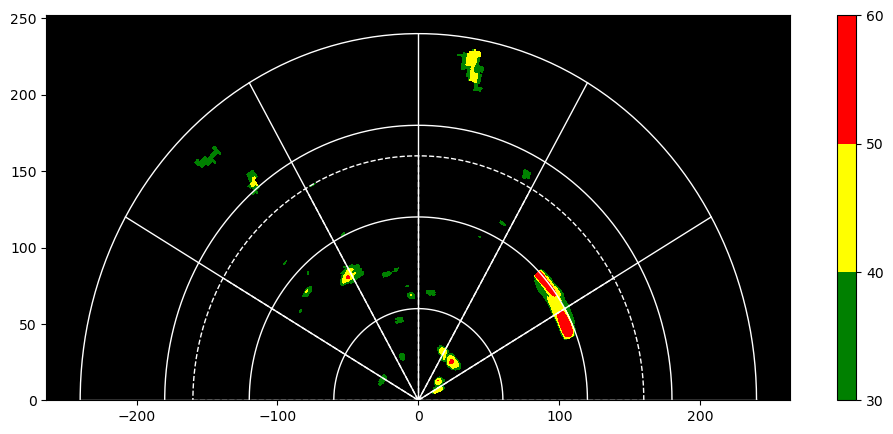

In [60]:
p_range = 160 # km
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1,facecolor='black')
#var_ac_clm = np.where(var_ac_clm == 3, np.nan, var_ac_clm) #ac

p_ref = ax.contourf(X1[:,int(p_range/0.15):] / 1000, Y1[:,int(p_range/0.15):]  / 1000, var_ac_cref[:,int(p_range/0.15):],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 

ref = np.where(ref < 10, np.nan, ref) #ac

pc = ax.contourf( radarX[0:int(p_range/0.15),:], radarY[0:int(p_range/0.15),:], ref[0:int(p_range/0.15),:], [30,40,50,60], shading='auto', cmap = cmap_ac, \
        tick_level=[30, 40, 50, 60])  
plt.colorbar(mappable=p_ref, ax=ax, orientation="vertical",ticks = [30,40,50,60])
graph.acdisplay.add_ring(ax, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)
graph.acdisplay.add_ring(ax, 0, np.pi, [p_range], color='white',linestyle='--', linewidth=1)

考虑到波束宽度，对于机载雷达的每一个有效像素点（>30 dBZ），查找前后3度径向和3 km范围的云掩膜，如果都是晴空，做一个标记。如果地面雷达也显示非气象，可直接抠除。

info: 1. 机载雷达数据中的分辨率～0.25度。 2. 对于CLM（cloud mask），0表示cloud,1表示probably cloud,2表示probably clear, 3表示clear

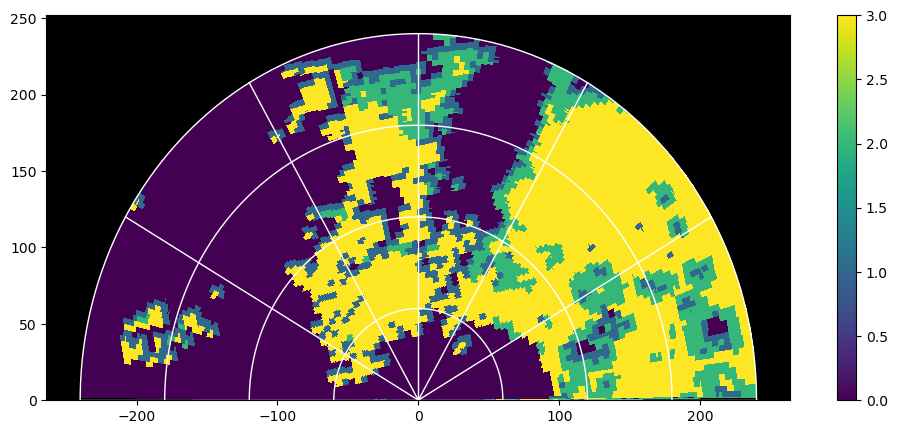

In [142]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1,facecolor='black')
p_ref = ax.pcolormesh(X1/1000, Y1/1000, var_ac_clm)
graph.acdisplay.add_ring(ax, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)
plt.colorbar(mappable=p_ref,ax=ax)

In [163]:
import copy
mask_ac = np.zeros(ref.shape,dtype= bool)
px, py = [], []
Bin_length = 0.15
ngate, naz = ref.shape
ref_filtered = copy.deepcopy(ref)
for i_az, az in enumerate(data['az_out']):
    for i_gate in np.arange(20,int(p_range/0.15)):
        if( ref[i_gate, i_az] > 30):
            az_0 = ac_parameters['heading_angle'] + round(az[0]) # corresponding angle in clm
            foo = var_ac_clm[ az_0 - 1 : az_0 + 1 + 1, i_gate - int(1/Bin_length) : i_gate + int(1/Bin_length) +1 ] #：后取不到
            foo_cref = var_ac_cref[ az_0 - 1 : az_0 + 1 + 1, i_gate - int(1/Bin_length) : i_gate + int(1/Bin_length) +1 ]
            grid_num = (1*2+1)*(int(1/Bin_length)*2+1)
            if np.sum( foo == 3 ) + np.sum( foo == 2 ) == grid_num and np.sum( foo_cref >= 30 ) == 0:  #the number 
                mask_ac[i_gate, i_az] = True
                px.append(i_gate * Bin_length * np.sin(np.deg2rad(az[0])))
                py.append(i_gate * Bin_length * np.cos(np.deg2rad(az[0])))
                ref_filtered[i_gate, i_az] = np.nan

a. 作一个标记，暂选用白色点表示

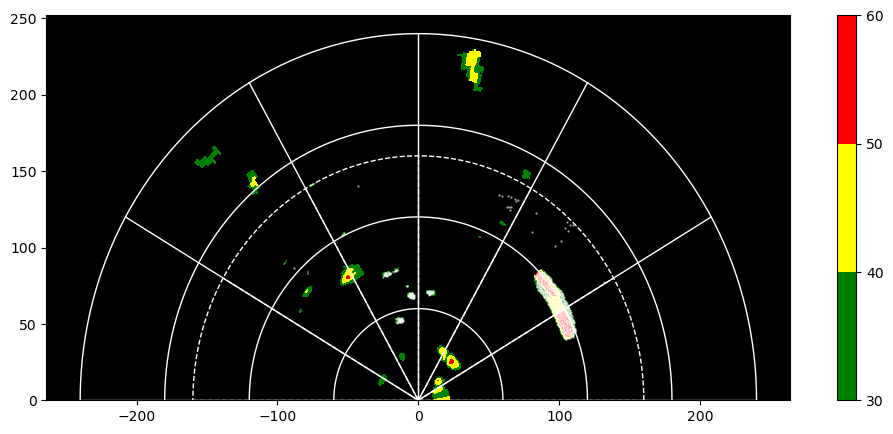

In [178]:
p_range = 160 # km
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1,facecolor='black')

# plot the mosaic composite refle. beyond the dash.
p_ref = ax.contourf(X1[:,int(p_range/0.15):] / 1000, Y1[:,int(p_range/0.15):]  / 1000, var_ac_cref[:,int(p_range/0.15):],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 
# plot the refl. within 0-20 and 70-90 degree. 
# Note: X1 is with shape of 360*ngate. it is valid between heading_angle-90 to heading_angle+90. 
# So, aiming to use the refl. at 0-20 and 70-90 degree, the slice range is heading_angle-90:heading_angle-90+20 and heading_angle+90-20:heading_angle+90.
heading_angle = ac_parameters['heading_angle']
p_ref2 = ax.contourf(X1[heading_angle-90:heading_angle-90+20,:] / 1000, Y1[heading_angle-90:heading_angle-90+20,:] / 1000, var_ac_cref[heading_angle-90:heading_angle-90+20,:],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 
p_ref3 = ax.contourf(X1[heading_angle+90-20:heading_angle+90,:] / 1000, Y1[heading_angle+90-20:heading_angle+90,:] / 1000, var_ac_cref[heading_angle+90-20:heading_angle+90,:],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 

pc = ax.contourf( radarX[0:int(p_range/0.15),:], radarY[0:int(p_range/0.15),:], ref[0:int(p_range/0.15),:], [30,40,50,60], shading='auto', cmap = cmap_ac, \
        tick_level=[30, 40, 50, 60])  
pc1 = ax.scatter(px[::11],py[::11], c = 'white', s = 0.5, alpha = 0.5 )
plt.colorbar(mappable=p_ref, ax=ax, orientation="vertical",ticks = [30,40,50,60])
graph.acdisplay.add_ring(ax, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)
graph.acdisplay.add_ring(ax, 0, np.pi, [p_range], color='white',linestyle='--', linewidth=1)

b. 直接抠除

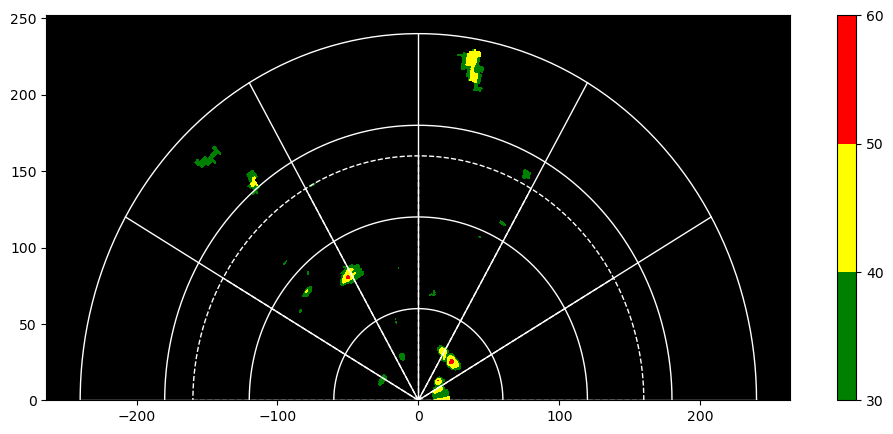

In [165]:
p_range = 160 # km
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1,facecolor='black')

# plot the mosaic composite refle. beyond the dash.
p_ref = ax.contourf(X1[:,int(p_range/0.15):] / 1000, Y1[:,int(p_range/0.15):]  / 1000, var_ac_cref[:,int(p_range/0.15):],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 
# plot the refl. within 0-20 and 70-90 degree. 
# Note: X1 is with shape of 360*ngate. it is valid between heading_angle-90 to heading_angle+90. 
# So, aiming to use the refl. at 0-20 and 70-90 degree, the slice range is heading_angle-90:heading_angle-90+20 and heading_angle+90-20:heading_angle+90.
heading_angle = ac_parameters['heading_angle']
p_ref2 = ax.contourf(X1[heading_angle-90:heading_angle-90+20,:] / 1000, Y1[heading_angle-90:heading_angle-90+20,:] / 1000, var_ac_cref[heading_angle-90:heading_angle-90+20,:],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 
p_ref3 = ax.contourf(X1[heading_angle+90-20:heading_angle+90,:] / 1000, Y1[heading_angle+90-20:heading_angle+90,:] / 1000, var_ac_cref[heading_angle+90-20:heading_angle+90,:],\
    [30,40,50,60], shading='auto', cmap = cmap_ac, tick_level=[30, 40, 50, 60]) 

pc = ax.contourf( radarX[0:int(p_range/0.15),:], radarY[0:int(p_range/0.15),:], ref_filtered[0:int(p_range/0.15),:], [30,40,50,60], shading='auto', cmap = cmap_ac, \
        tick_level=[30, 40, 50, 60])  

plt.colorbar(mappable=p_ref, ax=ax, orientation="vertical",ticks = [30,40,50,60])
graph.acdisplay.add_ring(ax, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)
graph.acdisplay.add_ring(ax, 0, np.pi, [p_range], color='white',linestyle='--', linewidth=1)

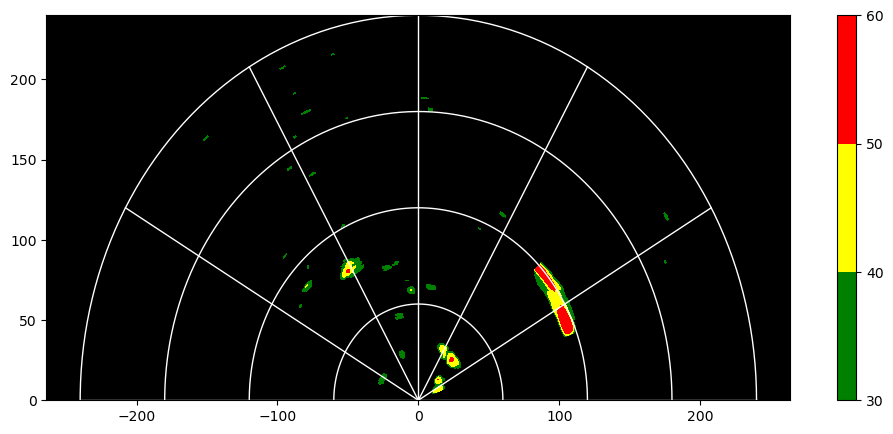

In [183]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1,facecolor='black')

gate_end = int(ac_parameters["Rmax_Air"]/Bin_length)

pc = ax.contourf( radarX[0:gate_end+1,:], radarY[0:gate_end+1,:], ref[0:gate_end+1,:], [30,40,50,60], shading='auto', cmap = cmap_ac, \
        tick_level=[30, 40, 50, 60])  
plt.colorbar(mappable=pc, ax=ax, orientation="vertical",ticks = [30,40,50,60])
graph.acdisplay.add_ring(ax, 0, np.pi, [0,60,120,180,240], color='white',linewidth=1)

In [ ]:
var_ac_cref > 40 and var_ac_clm == 3



In [ ]:
cc

In [ ]:
[True, False, True] and [True, True, False]

In [ ]:
import numpy as np
from netCDF4 import Dataset  # 读取nc文件用到的包
from scipy.interpolate import griddata  # 对SST空间插值用到的函数
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime


In [176]:
def get_var(filename : str, varname : str, lat, lon, fillvalue : list):
    '''
    params lat, lon: lat lon comes from the satellite lookup-table
    '''

    dataset = Dataset(filename)
    ll_extent = dataset.variables['geospatial_lat_lon_extent']
    lat_real = lat[ ll_extent.begin_line_number:ll_extent.end_line_number+1 , ll_extent.begin_pixel_number:ll_extent.end_pixel_number+1 ]
    lon_real = lon[ ll_extent.begin_line_number:ll_extent.end_line_number+1 , ll_extent.begin_pixel_number:ll_extent.end_pixel_number+1 ]
    data = dataset.variables[varname][:].data #需要自行查看一下变量的定义，有可能要对其做一定的变换
    for i in fillvalue:
        data[ data == i ] = np.nan

    return data, lat_real, lon_real

def interpolation_ll( extend : list, data_before, lat_real, lon_real, is_save : bool, file_out = None ):
    Min_Lat= 15
    Max_Lat = 55
    Min_Lon = 70
    Max_Lon = 140 #中国区域的经度范围70-140E，纬度范围15-55N

    Lat_After_1D = np.arange( Max_Lat, Min_Lat, -0.04 )  # 插值后的纬度
    Lon_After_1D = np.arange( Min_Lon, Max_Lon,  0.04 )  # 插值后的经度
    Lon_After_2D, Lat_After_2D = np.meshgrid(Lon_After_1D, Lat_After_1D) #打网格 (x,y)

    data_after = np.zeros( [Lat_After_2D.shape[0],Lat_After_2D.shape[1]] )
    LatLon_Before = np.hstack(
        (lat_real.reshape(-1, 1), lon_real.reshape(-1, 1)) ) # # 插值前的经纬度, 维度是(180*89,2), 按水平方向进行叠加，形成两列
    # 使用griddata函数插值
    data_after= griddata(LatLon_Before, data.reshape(-1, 1), (Lat_After_2D, Lon_After_2D),  method='nearest').squeeze() #squeeze去掉无用行

    # 如果需要的话可以存储一下，后面不用重新跑
    if (is_save):
        foo = xr.DataArray(data_after, coords = [ Lat_After_1D, Lon_After_1D], dims = ['latitude', 'longtitude']  )
        foo.to_netcdf(file_out+'.nc')

    return data_after, Lat_After_2D, Lon_After_2D

def plot_sat(data, Lat_2D, Lon_2D, is_ac_plot:bool, ac_ll=None,varname=None,ll_extend=None, \
    min_max=None, orientation="vertical",cmap='Blues', tick_level=None, cbar_ticklabels=None):
    # orientation这里没起作用，后面需要改colorbar的相关信息还需要改进
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import matplotlib.ticker as mticker
    import cartopy.crs as ccrs
    import cartopy.feature as cfeat
    
    if min_max is not None:
        vmin, vmax = min_max
    else:
        vmin = np.nanmin(data)
        vmax = np.nanmax(data)

    fig = plt.figure(figsize=(30,18))
    axe = plt.subplot(121, projection=ccrs.PlateCarree())
    
    with open(r'/Users/xiaowu/Library/Mobile Documents/com~apple~CloudDocs/work/MeteoDataFusion/ioo/CN-border-La.gmt') as src:
        context = ''.join([line for line in src if not line.startswith('#')])
        blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
        borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]

    for line in borders:
        axe.plot(line[0::2], line[1::2], '-', color='k', transform=ccrs.Geodetic())

    var_name = ['CLM', 'CTH'] #如果是其它的变量，自行往里添加
    long_name = ['cloud mask', 'cloud top height $\mathrm{(km)}$']
    dict_var_long = dict(zip(var_name, long_name))
    if (varname is not None):
        axe.set_title(dict_var_long[varname],fontsize=18)
    axe.add_feature(cfeat.COASTLINE.with_scale('10m'), linewidth=0.8,color='k')
    LAKES_border = cfeat.NaturalEarthFeature('physical', 'lakes', '50m', edgecolor='blue', facecolor='never')
    axe.add_feature(LAKES_border, linewidth=0.8)
    
    if ll_extend is not None:
        Min_Lat, Max_Lat, Min_Lon, Max_Lon = ll_extend #中国区域的经度范围70-140E，纬度范围15-55N
    else: 
        Min_Lat= 15
        Max_Lat = 55
        Min_Lon = 70
        Max_Lon = 140 #中国区域的经度范围70-140E，纬度范围15-55N

    gl = axe.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.8, color='gray',linestyle=':')
    gl.top_labels,gl.bottom_labels,gl.right_labels,gl.left_labels = False,False,False,False
    gl.xformatter = LONGITUDE_FORMATTER ##坐标刻度转换为经纬度样式
    gl.yformatter = LATITUDE_FORMATTER 
    gl.xlocator = mticker.FixedLocator(np.arange(Min_Lon, Max_Lon, 10))
    gl.ylocator = mticker.FixedLocator(np.arange(Min_Lat, Max_Lat, 10))

    axe.set_xticks(np.arange(Min_Lon, Max_Lon+1, 10), crs=ccrs.PlateCarree())
    axe.set_yticks(np.arange(Min_Lat, Max_Lat+1, 10), crs=ccrs.PlateCarree())
    axe.xaxis.set_major_formatter(LongitudeFormatter())
    axe.yaxis.set_major_formatter(LatitudeFormatter())
    axe.tick_params(labelcolor='k',length=5)

    axe.set_extent([Min_Lon,Max_Lon, Min_Lat, Max_Lat], crs=ccrs.PlateCarree()) #这里crs=ccrs.PlateCarree()一定要加上，不然那个范围就设置不对，暂时不知道为什么，留待以后发现了补充

    if (tick_level is None):
        tick_level = np.arange(vmin-0.5,vmax)
    contourf = axe.contourf(Lon_2D, Lat_2D, data, tick_level, cmap=cmap, extend='neither', shading='auto', alpha = 0.8)  #, vmax=vmax, vmin=vmin
    if (is_ac_plot):
        if (ac_ll is not None):
            plot_ac(axe, ac_ll) 
        else:
            raise AssertionError("aircraft location should be provided!")

   #if cbar_ticklabels is not None:
   #         if orientation == "vertical":
   #             cb.ax.set_yticklabels(cbar_ticklabels)
   #         else:
   #             cb.ax.set_xticklabels(cbar_ticklabels)

    rect = [0.125, 0.26, 0.35, 0.015] 
    cbar_ax = fig.add_axes(rect)
    cb = fig.colorbar(contourf, drawedges=True, cax=cbar_ax, orientation='horizontal',spacing='uniform', ticks = cbar_ticklabels)  
    plt.show()

<>:66: DeprecationWarning: invalid escape sequence \m
<>:66: DeprecationWarning: invalid escape sequence \m
/var/folders/8p/1s_25tdx2nxc6ffrjn_stzsm0000gn/T/ipykernel_88164/17548015.py:66: DeprecationWarning: invalid escape sequence \m
  long_name = ['cloud mask', 'cloud top height $\mathrm{(km)}$']


In [203]:
ll_center =[22.0017, 113.2208]
import numpy as np
from netCDF4 import Dataset  # 读取nc文件用到的包
from scipy.interpolate import griddata  # 对SST空间插值用到的函数
import matplotlib.pyplot as plt
import xarray as xr

# 读取经纬度查找表
with open('/Users/xiaowu/Downloads/空天地/空间匹配/FullMask_Grid_4000.raw', mode = 'rb') as file: #reading binary
   df = np.fromfile(file, dtype=np.float64)
   array = np.reshape(df,[2748, 5496])
   array = np.ma.masked_where(array > 360, array)
   np.ma.set_fill_value(array, -99)

lat = array[:, 0::2]
lon = array[:, 1::2]

#读取FY4A文件获取变量信息，对于CLM（cloud mask），0表示cloud,1表示probably cloud,2表示probably clear, 3表示clear
#infile = path + 'FY4A-_AGRI--_N_REGC_1047E_L2-_CLM-_MULT_NOM_20220926051500_20220926051917_4000M_V0001.NC'
infile = 'FY4A-_AGRI--_N_REGC_1047E_L2-_CTH-_MULT_NOM_20221214135336_20221214135753_4000M_V0001.NC'
infile = 'FY4A-_AGRI--_N_REGC_1047E_L2-_CTT-_MULT_NOM_20221214135336_20221214135753_4000M_V0001.NC'

data, lat_real, lon_real = get_var(filename=infile,varname="CTT", lat=lat, lon=lon, fillvalue=[126, 127])


In [204]:
#插值到等经纬度网格上，extend=None会默认中国区域经纬度范围，也可自己设置范围
# [ 15, 25, 100, 120]
data_after, Lat_After_2D, Lon_After_2D = interpolation_ll( extend=None, data_before=data, lat_real=lat_real, lon_real=lon_real, is_save=True, file_out = "CTT_after" )

/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/xiaowu/opt/anaconda3/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


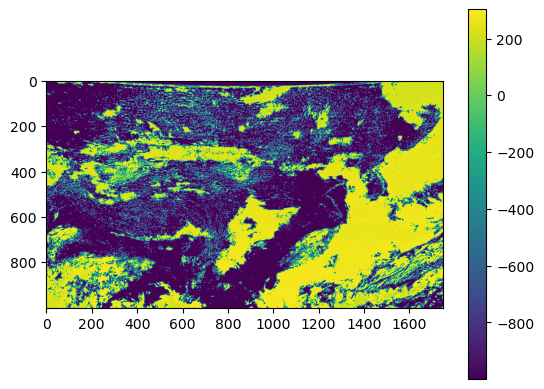

In [206]:
plt.imshow(data_after)
plt.colorbar()

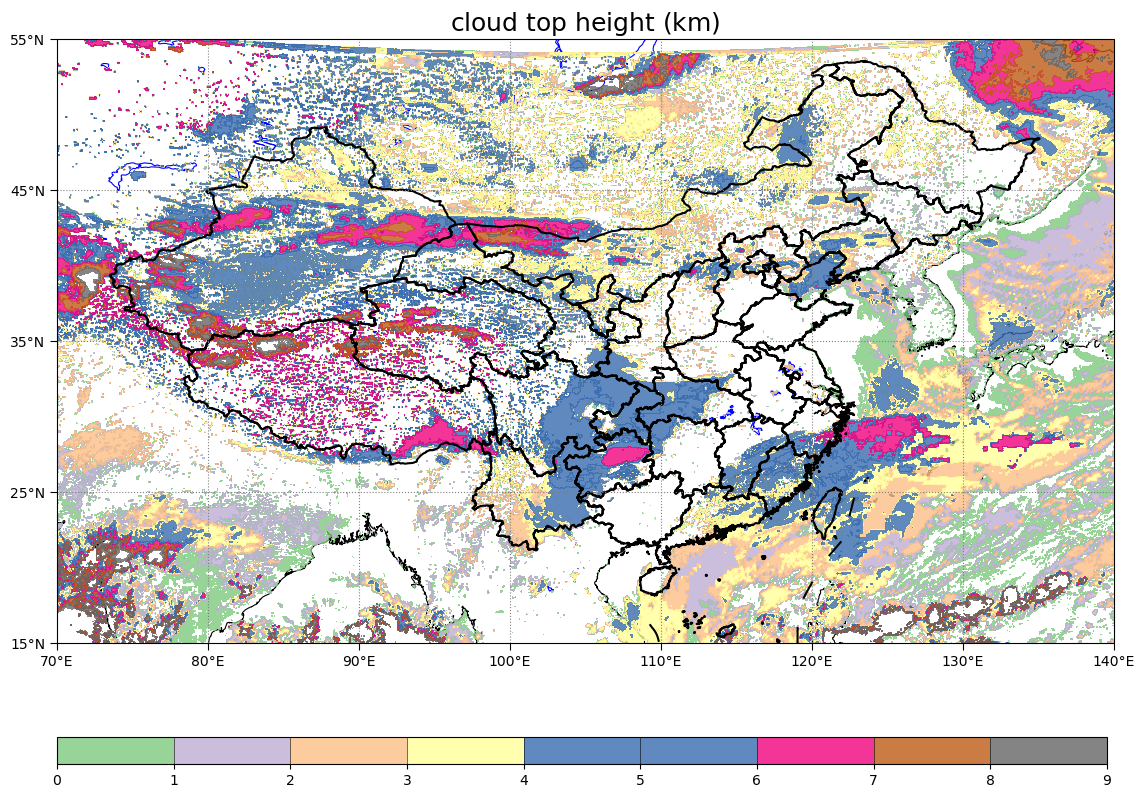

In [179]:
plot_sat(data=data_after,varname='CTT',Lat_2D=Lat_After_2D, Lon_2D=Lon_After_2D, is_ac_plot=False, min_max=[0,30], ac_ll=None,\
    ll_extend=None, orientation="vertical",cmap='Accent', tick_level=np.arange(0,10,1),cbar_ticklabels = np.arange(0,10,1))

In [215]:
def AngleToValid(angle):
    '''
    将角度限制在0-360度之间，如-90则变为270。
    '''
    ans = angle - int(np.floor_divide(angle, 360.0)) * 360

    return ans

def DMS2Decimal(dms):
    '''
    degrees minutes seconds to Decimal
    '''

    degrees = int( dms ) 
    minutes = int ( ( dms - degrees ) * 100 )
    seconds = ( dms - degrees - 0.01* minutes ) * 10000
    decimal = degrees + minutes/60.0 + seconds/3600.0
        
    return decimal

def rotate(x, y, alpha):
    '''
    图形旋转alpha度
    假设对图片上任意点(x,y)，绕一个坐标点(rx0,ry0)逆时针旋转a角度后的新的坐标设为(x0, y0)，有公式：
        x0= (x - rx0)*cos(a) - (y - ry0)*sin(a) + rx0 ;
        y0= (x - rx0)*sin(a) + (y - ry0)*cos(a) + ry0 ;
    '''
    alpha = np.deg2rad(alpha)
    x_r = x * np.cos(alpha) - y * np.sin(alpha)
    y_r = x * np.sin(alpha) + y * np.cos(alpha)
    return x_r, y_r

def add_ring(ax, azmin, azmax, rings, color="#5B5B5B", linestyle='-', linewidth=0.6, **kwargs):
    '''
    在图片上加距离环
    params azmin, azmax: 起始方位角
    params rings：（list） 要画的环的距离
    Usage：
    add_ring(ax1, 0,np.pi, [0, 40, 80, 120, 160], linestyle='-', linewidth=1)
    '''

    theta = np.linspace(azmin, azmax, 200)

    for i in rings:
        x0 = i * np.cos(theta)
        y0 = i * np.sin(theta)
        gci = ax.plot(x0, y0, linestyle=linestyle, linewidth=linewidth, color=color, **kwargs)  # plot circle
    for rad in np.arange(azmin, azmax + 0.01, np.pi / 6.0):
        gci = ax.plot([0, rings[-1] * np.cos(rad)], \
                      [0, rings[-1] * np.sin(rad)], \
                      linestyle=linestyle, linewidth=linewidth, color=color, **kwargs)  # plot line  

def get_ac(ac_parameters, var, lat, lon):
    '''
    params ac_parameters: a dictionary containing air-borne radar's parameters
    params var          : the product to transfer, should be 2D matrix
    params lat, lon     : 2D matrix, latitude and longtitude for var
    '''
    Rmax      = ac_parameters['Rmax_Air']
    Rmin      = ac_parameters['Rmin_Air']
    heading_angle = ac_parameters['heading_angle']
    range_angle   = ac_parameters['range_angle']
    Bin_length    = ac_parameters['Bin_length']
    DMS           = ac_parameters['DMS']
    if ( DMS == False ):
        lat0 =  ac_parameters['ll_center'][0]
        lon0 =  ac_parameters['ll_center'][1]
    else:
        lat0 = DMS2Decimal( ac_parameters['ll_center'][0] )
        lon0 = DMS2Decimal( ac_parameters['ll_center'][1] )

    # constant
    R_earth = 6371.393

    Azmin = heading_angle - range_angle
    Azmax = heading_angle + range_angle
    ngate = int(np.round((Rmax - Rmin) * 1000 / Bin_length))

    radarX = np.zeros((360, ngate), dtype = float ) 
    radarY = np.zeros((360, ngate), dtype = float ) 
    var_ac = np.zeros((360, ngate), dtype = float ) 
    for i_az in np.arange(Azmin, Azmax + 1):  # azimuth comes from east, the direction is counterclockwise
        for i_bin in np.arange(0, ngate):
            i_az_valied = int(AngleToValid(i_az))
            x = i_bin * Bin_length * np.sin(np.deg2rad(i_az))
            y = i_bin * Bin_length * np.cos(np.deg2rad(i_az))
            radarX[i_az_valied, i_bin] = x
            radarY[i_az_valied, i_bin] = y

            lat_grid = y / 1000.0 /111.0 + lat0
            lon_grid = np.rad2deg(x / 1000.0 /(R_earth * np.cos(np.deg2rad(lat_grid)))) + lon0

            y_index = np.argmin(np.abs(lat - lat_grid)) # lat：原始数据中的等经纬度网格；lat_grid：机载网格中点(i_az, i_bin)的经度。
            x_index = np.argmin(np.abs(lon - lon_grid))

            var_ac[i_az_valied, i_bin] = var[y_index, x_index] 

    return radarX, radarY, var_ac

def plot_ac(ac_parameters,radarX, radarY, var_ac, var_name, min_max, tick_level, cmap):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)

    X1, Y1 = rotate(radarX, radarY, heading_angle) 
    vmin, vmax = min_max
    pc = ax.pcolormesh( X1/1000, Y1/1000, var_ac, vmin = vmin, vmax = vmax, shading='auto', cmap = cmap )
    ax.set_title('%s with heading angle of %.2f'%(var_name, heading_angle), fontsize=20)
    plt.gca().set_aspect("equal")

    rect = [0.13, 0.24, 0.76, 0.02] # [left, bottom, width, height] 
    cbar_ax = fig.add_axes(rect)
    fig.colorbar(pc, ticks=tick_level, cax=cbar_ax, orientation='horizontal')
    rings = np.linspace(0, Rmax, 5)
    add_ring(ax, 0, np.pi, rings, color='k', linestyle='-', linewidth=1.5)

In [195]:
infile = r'CTH_after.nc'
from netCDF4 import Dataset  # 读取nc文件用到的包
ds = Dataset(infile)
var = ds.variables['__xarray_dataarray_variable__'][:].data
lat = ds.variables['latitude'][:].data
lon = ds.variables['longtitude'][:].data

# constant
R_earth = 6371.393

heading_angle = -170
Rmax = 480

ac_parameters = { "Rmax_Air":480, "Rmin_Air":0, "heading_angle":-170, "ll_center":[21.6163, 112.4713], \
    "range_angle":90, "Bin_length":1000, "DMS":False }

radarX, radarY, var_ac = get_ac(ac_parameters, var, lat, lon)

In [216]:
infile = r'CTT_after.nc'
from netCDF4 import Dataset  # 读取nc文件用到的包
ds = Dataset(infile)
var = ds.variables['__xarray_dataarray_variable__'][:].data
lat = ds.variables['latitude'][:].data
lon = ds.variables['longtitude'][:].data

# constant
R_earth = 6371.393

heading_angle = -170
Rmax = 480

ac_parameters = { "Rmax_Air":480, "Rmin_Air":0, "heading_angle":-170, "ll_center":[21.6163, 112.4713], \
    "range_angle":90, "Bin_length":1000, "DMS":False }

radarX, radarY, var_ac = get_ac(ac_parameters, var, lat, lon)


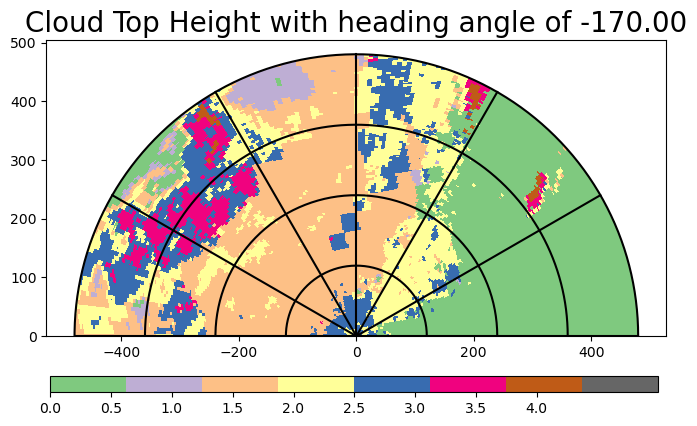

In [197]:

plot_ac(ac_parameters,radarX, radarY, var_ac, "Cloud Top Height", [0, 5], tick_level = np.arange(0,4.5,0.5), cmap = "Accent")


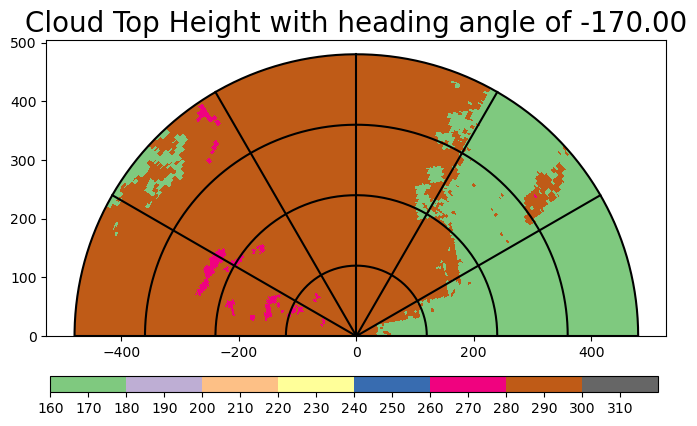

In [227]:
plot_ac(ac_parameters,radarX, radarY, var_ac_new, "Cloud Top Height", [160, 320.], tick_level = np.arange(160,320,10), cmap = "Accent")

In [221]:
var_ac_new = np.where(var_ac < -10000, np.nan, var_ac)
var_ac_new = np.where(var_ac > 10000, np.nan, var_ac)

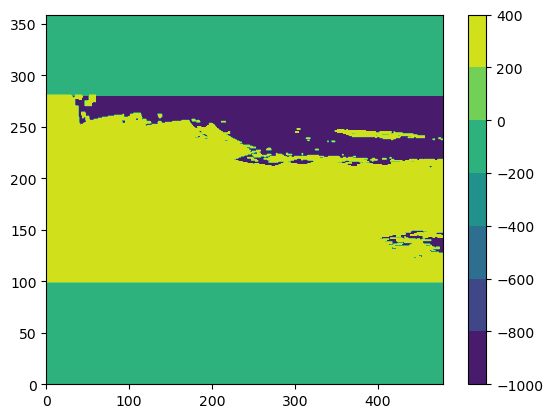

In [220]:
plt.contourf(var_ac)
plt.colorbar()

In [228]:
var_ac_new[240:250, 400]

array([-999.        ,  280.35656738,  281.46072388,  284.64303589,
        286.58483887, -999.        , -999.        , -999.        ,
       -999.        , -999.        ])

In [201]:
var_ac[240:250, 400]

array([-999.        , 3813.13549805, 3556.20239258, 2143.59155273,
        484.44604492, -999.        , -999.        , -999.        ,
       -999.        , -999.        ])

In [202]:
var_ac[130,120:150]

array([1743.41625977, 1743.41625977, 1743.41625977, 1743.41625977,
       1781.32653809, 1781.32653809, 1781.32653809, 1781.32653809,
       1781.32653809, 1762.05383301, 1762.05383301, 1760.94213867,
       1760.94213867, 1760.94213867, 1760.94213867, 1772.39550781,
       1772.39550781, 1772.39550781, 1758.67504883, 1758.67504883,
       1808.00769043, 1808.00769043, 1808.00769043, 1808.00769043,
       1808.00769043, 1782.9708252 , 1796.74414062, 1796.74414062,
       1796.74414062, 1796.74414062])

In [225]:
var_ac_new[130,120:150]

array([280.94113159, 280.94113159, 280.94113159, 280.94113159,
       280.71960449, 280.71960449, 280.71960449, 280.71960449,
       280.71960449, 280.90847778, 280.90847778, 280.91937256,
       280.91937256, 280.91937256, 280.91937256, 280.80712891,
       280.80712891, 280.80712891, 280.94158936, 280.94158936,
       280.45812988, 280.45812988, 280.45812988, 280.45812988,
       280.45812988, 280.70349121, 280.56851196, 280.56851196,
       280.56851196, 280.56851196])